In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
df = pd.read_csv("Social_Network_Ads.csv")
df = df[['Age', 'EstimatedSalary', 'Purchased']]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [53]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [56]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = []

In [57]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

In [58]:
result_df = pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print(result_df)


                 Model  Accuracy
1                  KNN    0.9250
2                  SVM    0.9250
4        Random Forest    0.8875
0  Logistic Regression    0.8625
3        Decision Tree    0.8375


SELECTING KNN AS THE MODEL

In [61]:
final_model = KNeighborsClassifier()
final_model.fit(X_train, y_train)

KNeighborsClassifier()

test batch 1

In [62]:
test_batch_1 = pd.DataFrame([
    [30, 87000],
    [40, 0],
    [40, 100000],
    [50, 0]
], columns=['Age', 'EstimatedSalary'])

test_batch_1_scaled = scaler.transform(test_batch_1)

pred_1 = final_model.predict(test_batch_1_scaled)

test_batch_1['Prediction'] = pred_1
test_batch_1['Prediction'] = test_batch_1['Prediction'].map({1: 'Will Buy', 0: 'Won’t Buy'})

print(test_batch_1)

   Age  EstimatedSalary Prediction
0   30            87000  Won’t Buy
1   40                0  Won’t Buy
2   40           100000   Will Buy
3   50                0   Will Buy


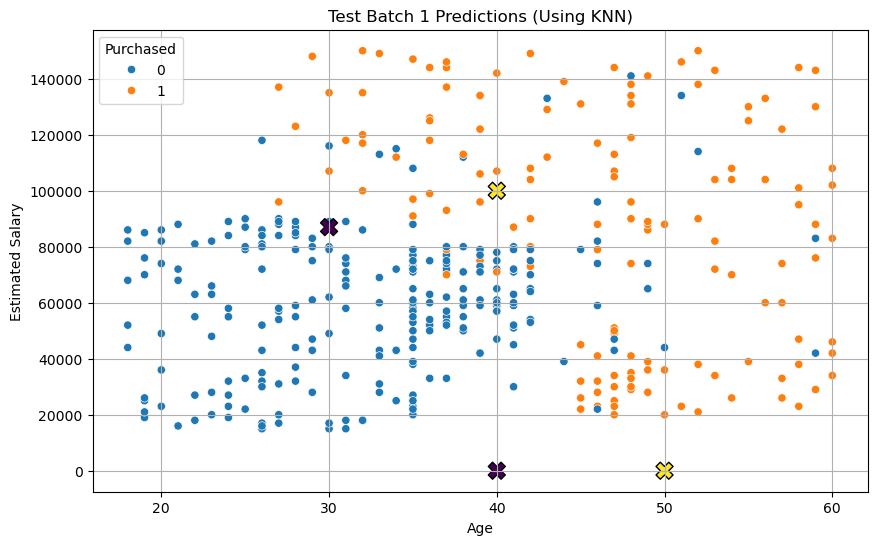

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['EstimatedSalary'], hue=df['Purchased'])
plt.scatter(test_batch_1['Age'], test_batch_1['EstimatedSalary'], 
            c=pred_1, marker='X', s=150, edgecolors='black')
plt.title('Test Batch 1 Predictions (Using KNN)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.grid(True)
plt.show()


batch 2

In [64]:
test_batch_2 = pd.DataFrame([
    [18, 0],
    [22, 600000],
    [35, 2500000],
    [60, 100000000]
], columns=['Age', 'EstimatedSalary'])

test_batch_2_scaled = scaler.transform(test_batch_2)
pred_2 = final_model.predict(test_batch_2_scaled)
test_batch_2['Prediction'] = pred_2
test_batch_2['Prediction'] = test_batch_2['Prediction'].map({1: 'Will Buy', 0: 'Won’t Buy'})

print(test_batch_2)


   Age  EstimatedSalary Prediction
0   18                0  Won’t Buy
1   22           600000   Will Buy
2   35          2500000   Will Buy
3   60        100000000   Will Buy


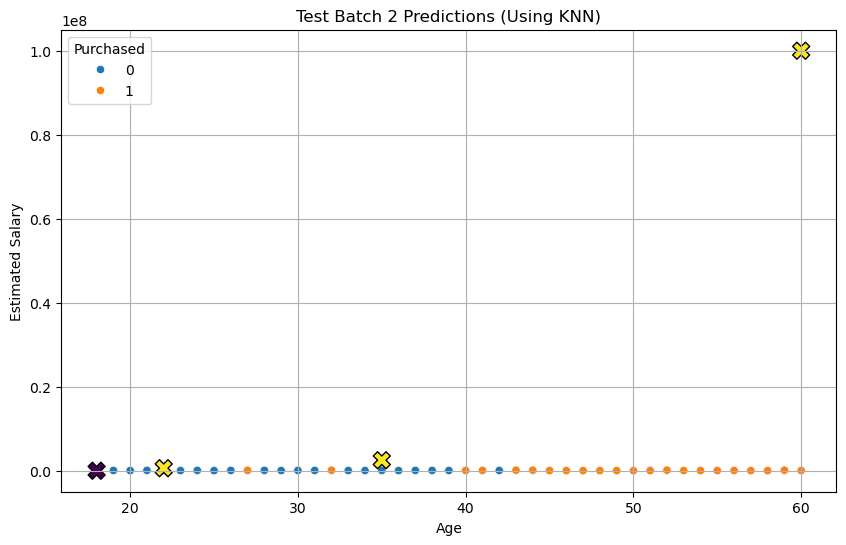

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['EstimatedSalary'], hue=df['Purchased'])
plt.scatter(test_batch_2['Age'], test_batch_2['EstimatedSalary'], 
            c=pred_2, marker='X', s=150, edgecolors='black')
plt.title('Test Batch 2 Predictions (Using KNN)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.grid(True)
plt.show()


From the comparison of multiple models, KNN gave the highest accuracy of 92.5%, making it the most suitable model for this data.